<div style="text-align: center;">
  <h1>Wine Quality Classification</h1>
  <h2>Author: Korosaki</h2>
  <h3>Date: Feb 2025</h3>
</div>

# Data Partitioning

In [1]:
import joblib
import yaml
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

data_path = config['paths']['data']
model_path = config['paths']['model']

print(data_path)
print(model_path)

D:/Workspace/Machine_Learning/Supervised_Learning/Classification/Wine_Quality_Classification/data
D:/Workspace/Machine_Learning/Supervised_Learning/Classification/Wine_Quality_Classification/model


In [3]:
from summarytools import dfSummary

df = pd.read_csv(join(data_path, 'processed/processed_data.csv'))
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,fixed_acidity[float64],Mean (sd) : 9.8 (2.4)min < med < max:3.8 < 10.0 < 15.9IQR (CV) : 4.2 (4.1),120 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACx0lEQVR4nO3dsW4aMRzH8Z9LEi4EHSAk2LJmqNQhIw/Rh+0jZMjQMcobsKEkCBQKhRA6dajUpjn7zPnvfD+7lRu+spzDZ7vD4SAgdZ+afgDgPU6afoC3OOfOJZ15Dt8eDod1nc+D5iQbqnPufDgcfi3LcuAzfrlczp1z34g1D8mGKumsLMvBZDJZ93q9TZWBi8WiuL29HTw+Pp5JItQMpByqJKnX621Go9EPj6HntT8MGpN8qB9N4LpcynRtTqgJCV2XS/muzQk1goBZsex2u6PJZLKsui6X8l6bE2rNQmbF3W5X7Pf7z+12+8ZzXS5lujYn1Pp5v62YTqeD+/v7zsvLSyvWw1lFqJH4vK2Yz+dZzoZ14CdUmECoMIFQYQKhwgRChQmEChMIFSYQKkwgVJjAL1P/ELKx5PX19bTu53mv/X5/Kql0zvkMT3aLIKH+RR0bSzabzY0k340lXlar1elut/tyeXnZarValXdfpbxFMNtQA2cW7+12TW4s2W63J0VRdK6vrzfj8XheZWzqWwSzDDV0ZgnZbpfCxpKLi4vsPt/JMtSQmUViu12Ksgz1N9+ZJYVZEX/i9RRMIFSYQKgwgVBhAqHCBEKFCYQKEwgVJhAqTCBUmECoMIFQYQKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGFC1I/7Ai/3avTEEaQlWqihl3s1eeLIRxV4aIcU8UigmDOq9zU2Et/WH1vooR1S3COBon/X73vpLt/WH1fooR2xjwTK+gAKVBdwHJAU8Ugg/uuHCYQKEwgVJhAqTCBUmECoMIFQYQKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGEC+1FRm5g3W/83VKvXgeO4Yt9s/WaodVwH/vDw8L3qWEl6fn4uJGm1WhWz2axzrLFN/m2rzy1JT09P3aIoOldXV67f7/+sMna9Xrfv7u7e/IzlF3qodyA3SVHiAAAAAElFTkSuQmCC"">",0(0.0%)
2,volatile_acidity[float64],Mean (sd) : 0.8 (0.4)min < med < max:0.1 < 0.8 < 1.6IQR (CV) : 0.7 (2.1),232 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACqElEQVR4nO3dMY7aQBSA4TdhIQYiA0KCjpYiUgpKDpHD5ggpOMCKG9AhATLCwcEYUiNtWPAweN7wf72XKX6jnRmPMefzWQDffal6AMAt3qoeAC4ZY5oi0rD4E4fz+bx/1Hh8QageMcY0+/3+zziOe2X/xna73RhjfoUWK6H6pRHHcW86ne47nU5278VJkkSz2ay3Wq0aIkKocKvT6WSDweBPycubDx2MJ5hMQQVChQqEChUIFSoQKlRwOutn8RqP4izUV168trhB49PpVH/0eELg8hv1JRevbW7QPM+joii+Z1n2W0TKrqMGyfmC/wsuXpe+QReLRW8+n7eOx2PN1eC0YmfKkTI36Gaz0XhjPgWzfqhAqFCBUKECoUIFQoUKzPoDUxRFXURiY0yZy73dCSTUgKRpWs/z/MdoNKrVarW7N1l83gkk1IAcDoe3KIpak8kkGw6Hm3uu9X0nkFD/Q/N+fbvdLrsb6O2GA6F+gP16/xDqx9iv9wyhXsF+vT9YR4UKhAoVCBUqECpUIFSoQKhQgVChQrDrqJbvFKh8GxSXggzV9p0CbIP6J8hQxfKdAmyD+ifUUEWk/DsF2Ab1z6ehan7cDeG4GmrVj7tZHKvgJgnMZ9+olT3uZnOsgslQeG76H7WKx91sjlUwGQqP95OpMscqmAyFx/tQ8TyWR61FHB63JlSIiP1RaxG3x60JFSJiNycQcX/cmlBxweKotYjD49Y8PQUVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlTgzBQexuUvWxMqHsL1L1vfFGqSJNG9H7zb7SIRkTRNo+Vy2Xrm9Vo/W+u4RUTW6/W3KIpa4/HYdLvdv/dcu9/vv76/v189av0PFm2kF3W71KMAAAAASUVORK5CYII="">",0(0.0%)
3,citric_acid[float64],Mean (sd) : 0.8 (0.4)min < med < max:0.0 < 0.9 < 1.7IQR (CV) : 0.7 (2.1),160 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACiUlEQVR4nO3dP27iQBSA8TdLQAa0thASdFxgpRSUHGIPu0fYghNwAxqEhJAR3lgY41QpIkUJ/jPLe5Pv1xtcfCJ+nhnFVVUlgHY/Hn0DwD2eHn0DeM85NxSRQYuPuFRV9dLV/WhBqIo454bT6fR3HMeTpp9xOp2Ozrk/ocVKqLoM4jierFarlyRJ8roXp2kardfryeFwGIgIocKvJEny2Wz2r+Hlw05vRgmGKZhAqDCBP/0etJjc49vt1u/6fkJAqB1rM7kXRRGVZfkrz/O/ItL0GTVIhNq9xpP7drudbDab0fV67fm6OasI1ZMmk/vxeAxyYu+C11BZZUFXvIXKKgu65PMXlVUWdMb7MyqrLOgCL/xhAlN/YMqy7ItI7Jxrcrna4ZVQA5JlWb8oiufFYtHr9Xq15wLNwyuhBuRyuTxFUTRaLpf5fD4/1rlW+/BKqAEaj8dNB1i1wyvDFEwgVJhAqDCBUGECocIEQoUJql9PhbrKgvrUhhryKgvqUxtqyKssqE9tqG9CXGVBfepDfRSOPOtCqB/gyLM+hPoxjjwrQ6if4MizHrzwhwmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJwa5Mtdx0zcYSZYIMte2mazaW6BNkqG02XYuwsUSjIEN903TT9XfdWNLycUnE4zm1oEPF/do+Lon4PadGqBCR9o9Lvs+pESreaXFGTcTjOTXeo8IEQoUJhAoTCBUmfDlMcb4dGnwaKufbocVXv6icb4cKd71H5Xw7Ho1hCiYQKkwgVJhAqDCBUGECocIEQoUJhAoTCBUmsMMfnfH5D+zuCjVN06jut57P50hEJMuyaL/fj/7n9Va/2+p9i4jsdrufPv+B3SunhaATNfI+kQAAAABJRU5ErkJggg=="">",0(0.0%)
4,residual_sugar[float64],Mean (sd) : 31.3 (19.0)min < med < max:0.6 < 37.6 < 65.8IQR (CV) : 37.0 (1.6),738 distinct va

In [4]:
y = df['quality']
X = df.drop(columns=['quality', ])

In [5]:
y.value_counts()

quality
3    3000
4    3000
5    3000
6    3000
7    3000
8    3000
9    3000
Name: count, dtype: int64

In [6]:
# Balancing Data with SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators= 187, max_depth= 31, min_samples_split= 2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=31, n_estimators=187, random_state=42)

In [9]:
rf_model.score(X_train, y_train)

1.0

In [10]:
rf_model.score(X_test, y_test)

0.9866666666666667

In [11]:
y_pred = rf_model.predict(X_test)

## Model Evaluation

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

acc = accuracy_score(y_test, y_pred)
print(f'accuracy: {acc}')

accuracy: 0.9866666666666667


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       887
           4       0.99      1.00      0.99       896
           5       0.99      0.99      0.99       954
           6       0.99      0.97      0.98       888
           7       0.96      0.98      0.97       898
           8       0.98      0.98      0.98       919
           9       1.00      0.99      1.00       858

    accuracy                           0.99      6300
   macro avg       0.99      0.99      0.99      6300
weighted avg       0.99      0.99      0.99      6300



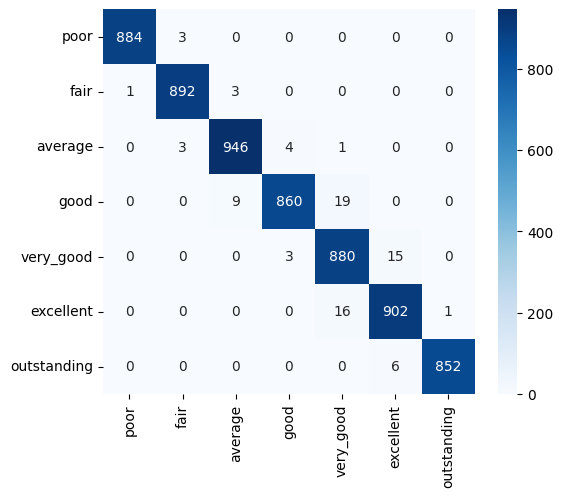

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['poor', 'fair', 'average', 'good', 'very_good', 'excellent', 'outstanding'],
            yticklabels=['poor', 'fair', 'average', 'good', 'very_good', 'excellent', 'outstanding'])
plt.show()

In [15]:
joblib.dump(rf_model, join(model_path, 'wine_classification.pkl'))

['D:/Workspace/Machine_Learning/Supervised_Learning/Classification/Wine_Quality_Classification/model\\wine_classification.pkl']